In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

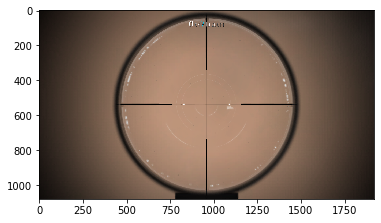

In [33]:
img = cv2.imread('test_image2.png')
plt.imshow(img)
plt.show()

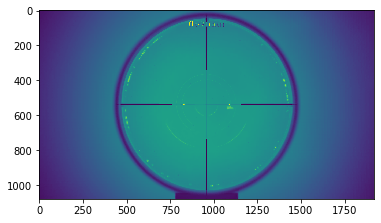

In [34]:
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imggray)
plt.show()

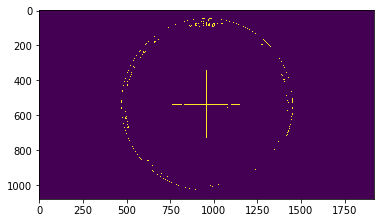

In [35]:
edges = cv2.Canny(imggray, 50, 150, apertureSize = 3)
plt.imshow(edges)
plt.show()

In [36]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
lines

array([[[536.       ,   1.5707964]],

       [[541.       ,   1.5707964]],

       [[961.       ,   0.       ]],

       [[956.       ,   0.       ]],

       [[958.       ,   0.       ]],

       [[538.       ,   1.5707964]]], dtype=float32)

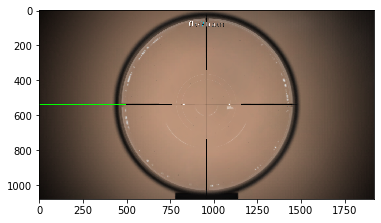

In [37]:
for line in lines:
    r, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = r*a
    y0 = r*b
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
plt.imshow(img)
plt.show()

In [38]:
from mpl_toolkits import mplot3d

In [39]:
xmax, ymax = imggray.shape
x = np.arange(xmax)
y = np.arange(ymax)

X, Y = np.meshgrid(x, y)
z_function = lambda x, y: imggray[x, y]
Z = z_function(X, Y)

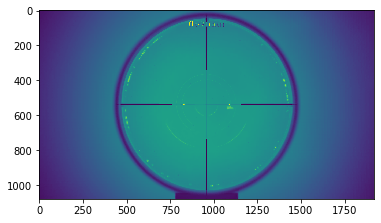

In [40]:
plt.imshow(imggray)

In [41]:
import ipywidgets as widgets

def visualize(x, y):
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, color='green')
    ax.view_init(x, y)
    plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(imggray, bins=500);

In [42]:
vis = widgets.interactive(visualize, x=widgets.IntSlider(value=45, min=0, max=360, step=1), y=widgets.IntSlider(value=45, min=0, max=360, step=1))

In [43]:
vis

interactive(children=(IntSlider(value=45, description='x', max=360), IntSlider(value=45, description='y', max=…

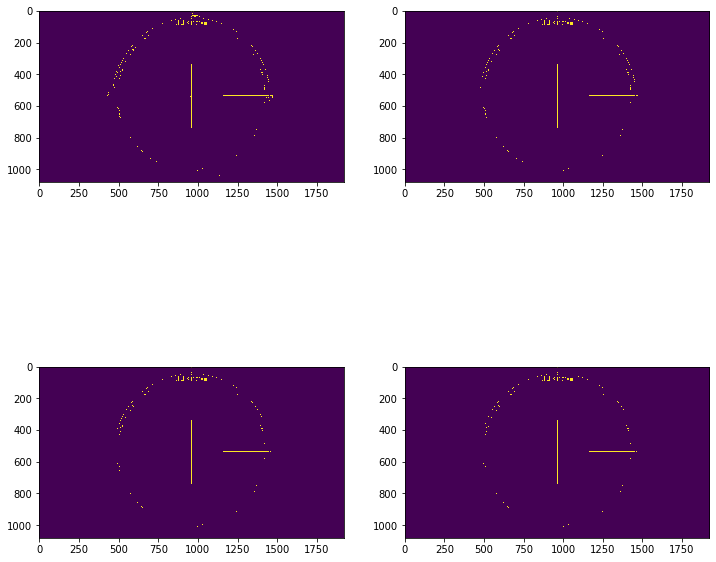

In [66]:
plt.figure(figsize=(12,12))
edge1 = cv2.Canny(img, 20, 200)
edge2 = cv2.Canny(img, 100, 200)
edge3 = cv2.Canny(img, 150, 200)
edge4 = cv2.Canny(img, 170, 200)

plt.subplot(221)
plt.imshow(edge1)

plt.subplot(222)
plt.imshow(edge2)

plt.subplot(223)
plt.imshow(edge3)

plt.subplot(224)
plt.imshow(edge4)